In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  

In [2]:
df=pd.read_csv("C:\\Users\\kushagra gemini\\Desktop\\loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Target variable i.e. Loan_Status is object so we'll use Classification to learn our model.

# Exploratory Data Analysis

<Axes: >

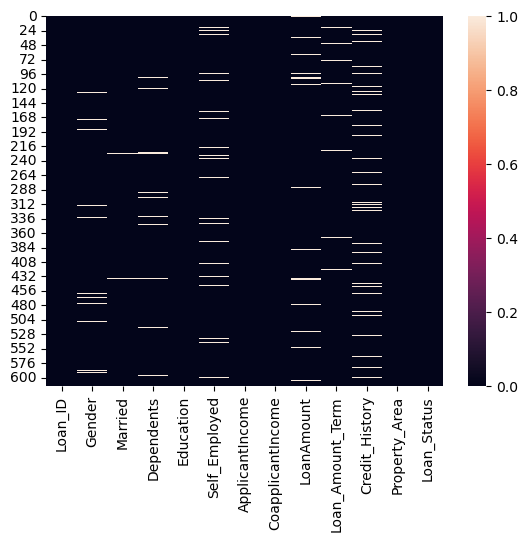

In [8]:
sns.heatmap(df.isnull()) 

In [10]:
#Replacing null values of object column with mode of it.
import numpy as np
collist=df.columns.values
for i in range(0,len(collist)):
    if df[collist[i]].dtype == "object":
        df[collist[i]].fillna(df[collist[i]].mode()[0], inplace=True)

In [11]:
#Replacing non object values i.e. int64 and float64 null values with mean of it.
import numpy as np
collist=df.columns.values
for i in range(0,len(collist)):
    if df[collist[i]].dtype != "object":
        df[collist[i]].fillna(df[collist[i]].mean(), inplace=True)

<Axes: >

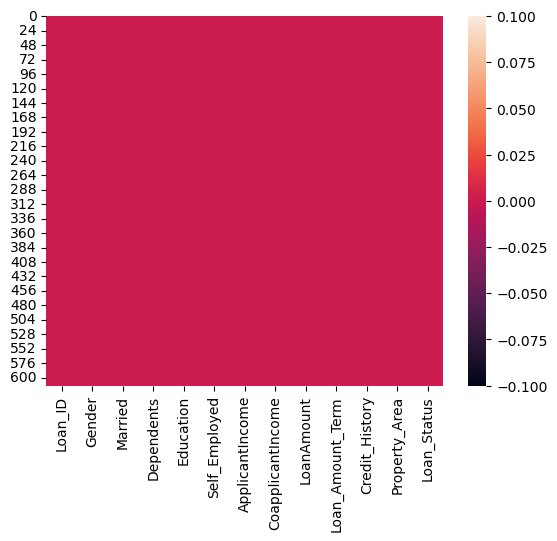

In [12]:
sns.heatmap(df.isnull())

Univariate Analysis

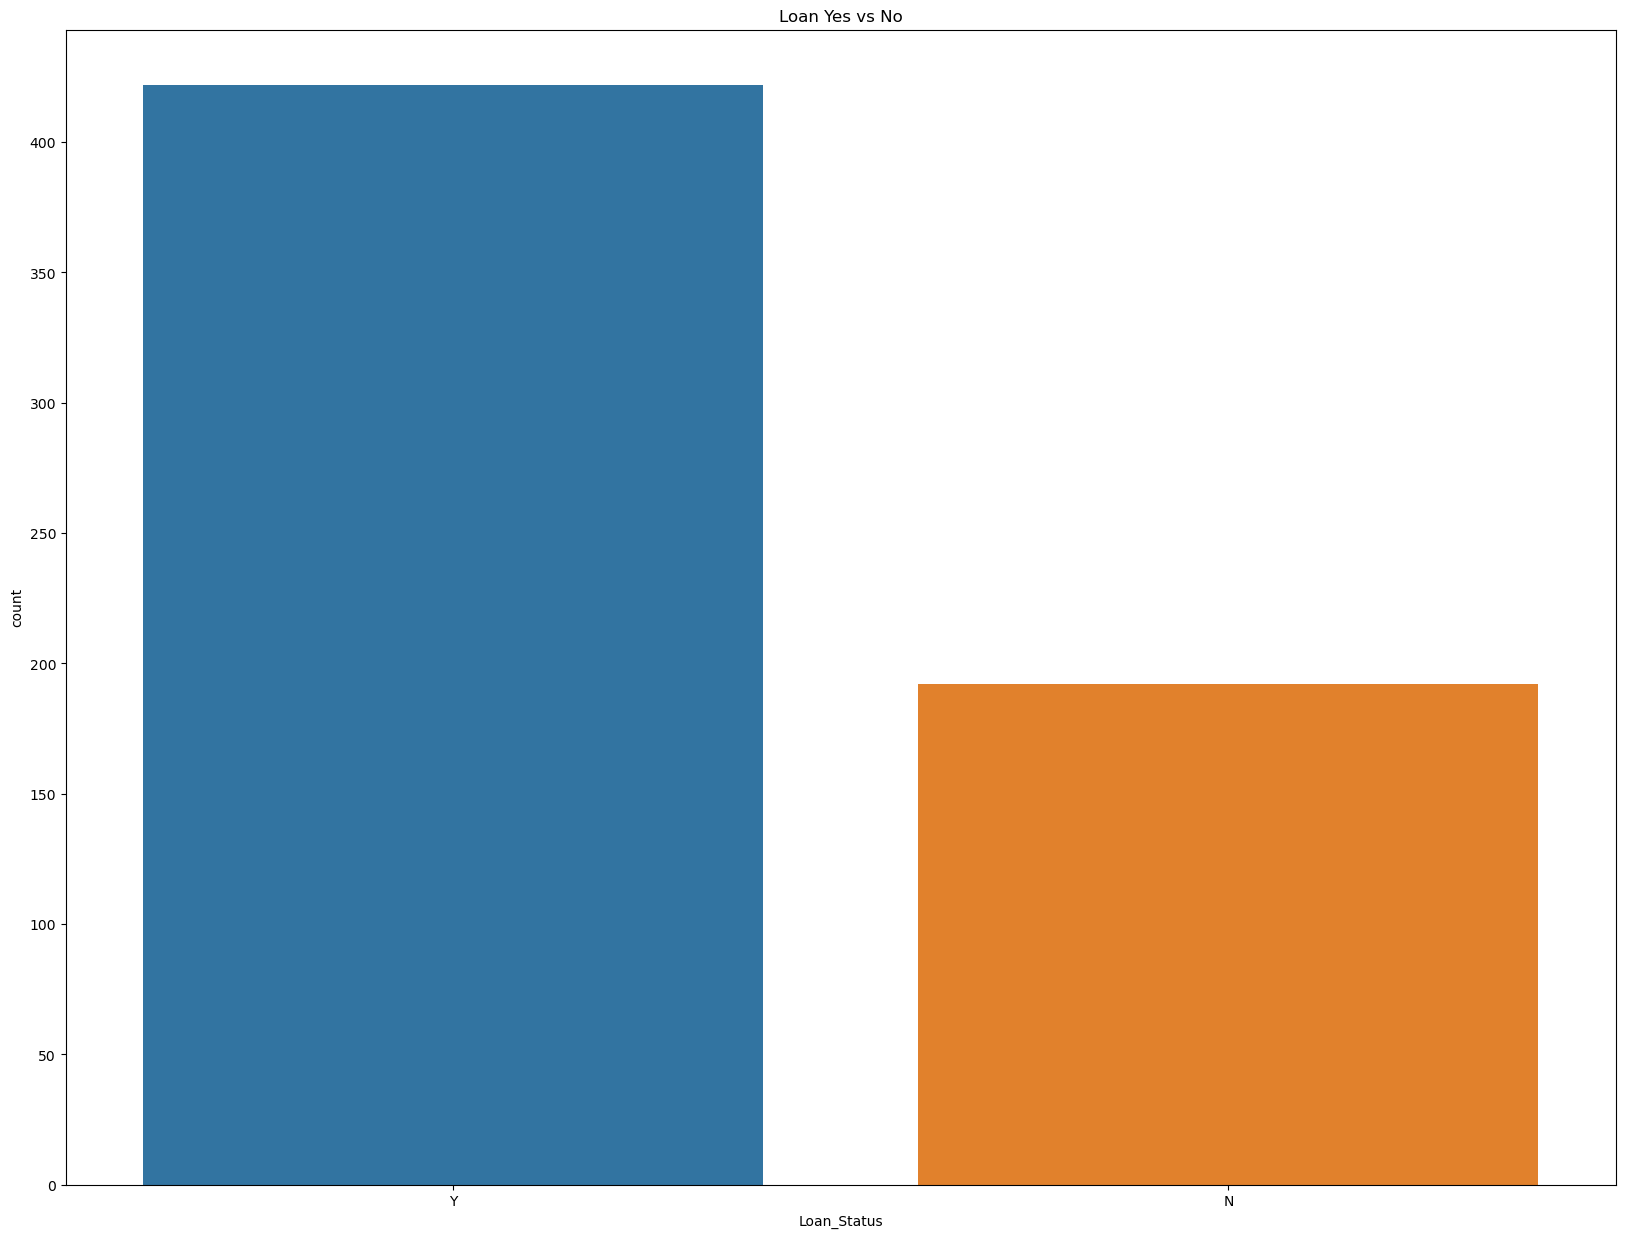

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Yes vs No", fontsize = 12)
plt.show()

Here are 422 Yes and 192 No

In [17]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

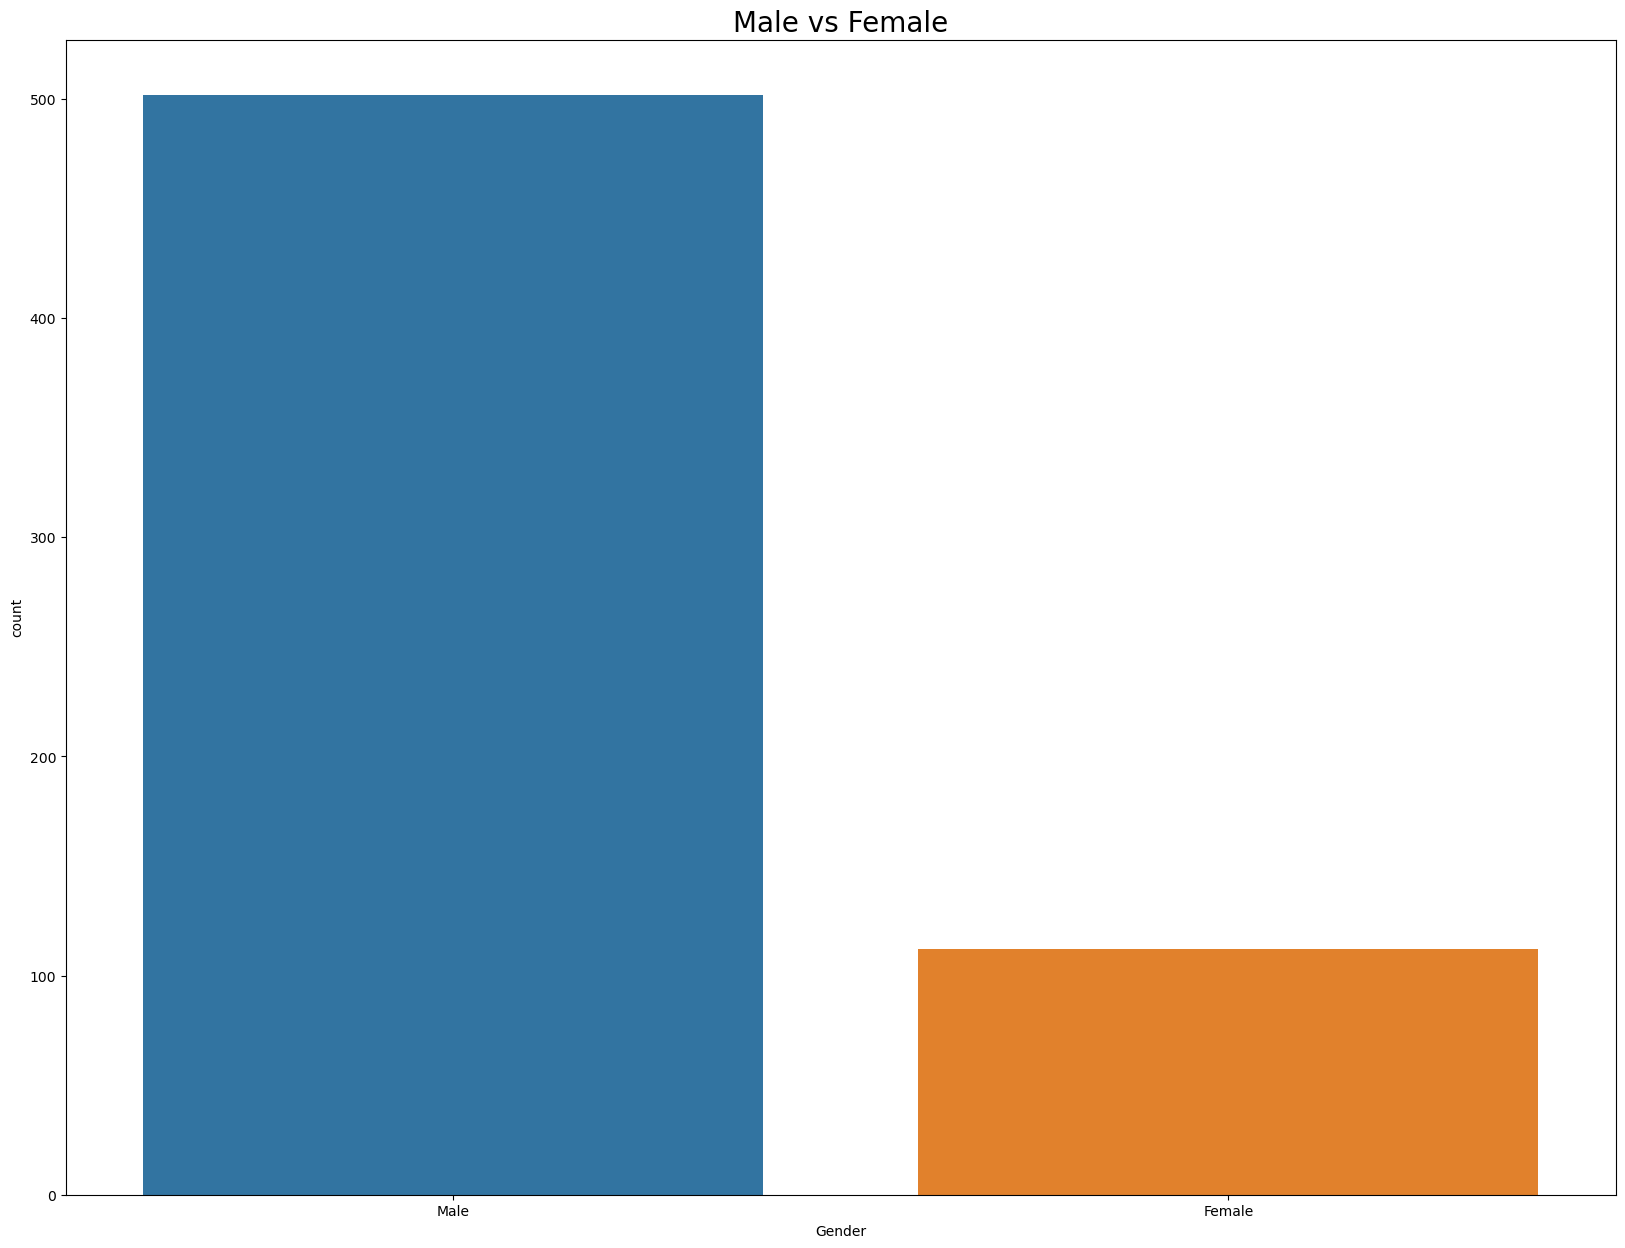

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.countplot(x="Gender", data=df)
plt.title("Male vs Female", fontsize = 20)
plt.show()

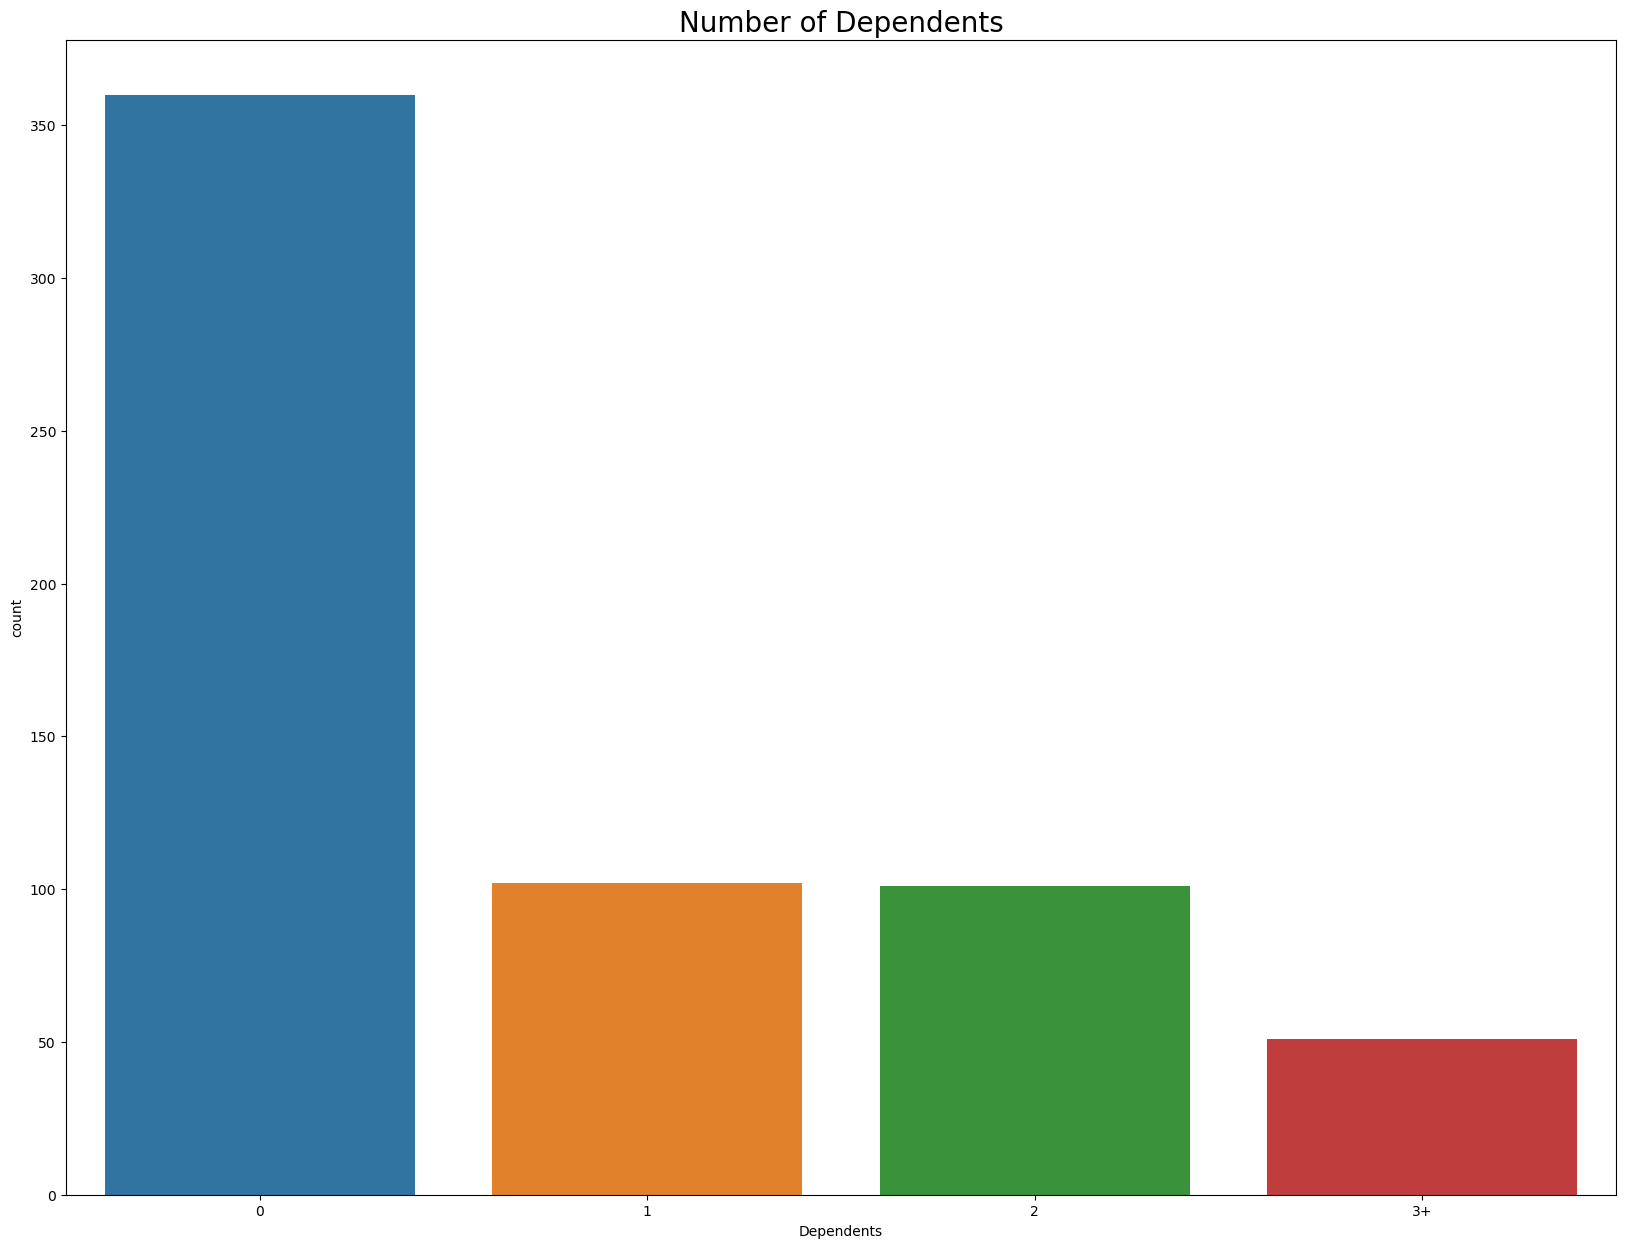

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.countplot(x="Dependents", data=df)
plt.title("Number of Dependents", fontsize = 20)
plt.show()

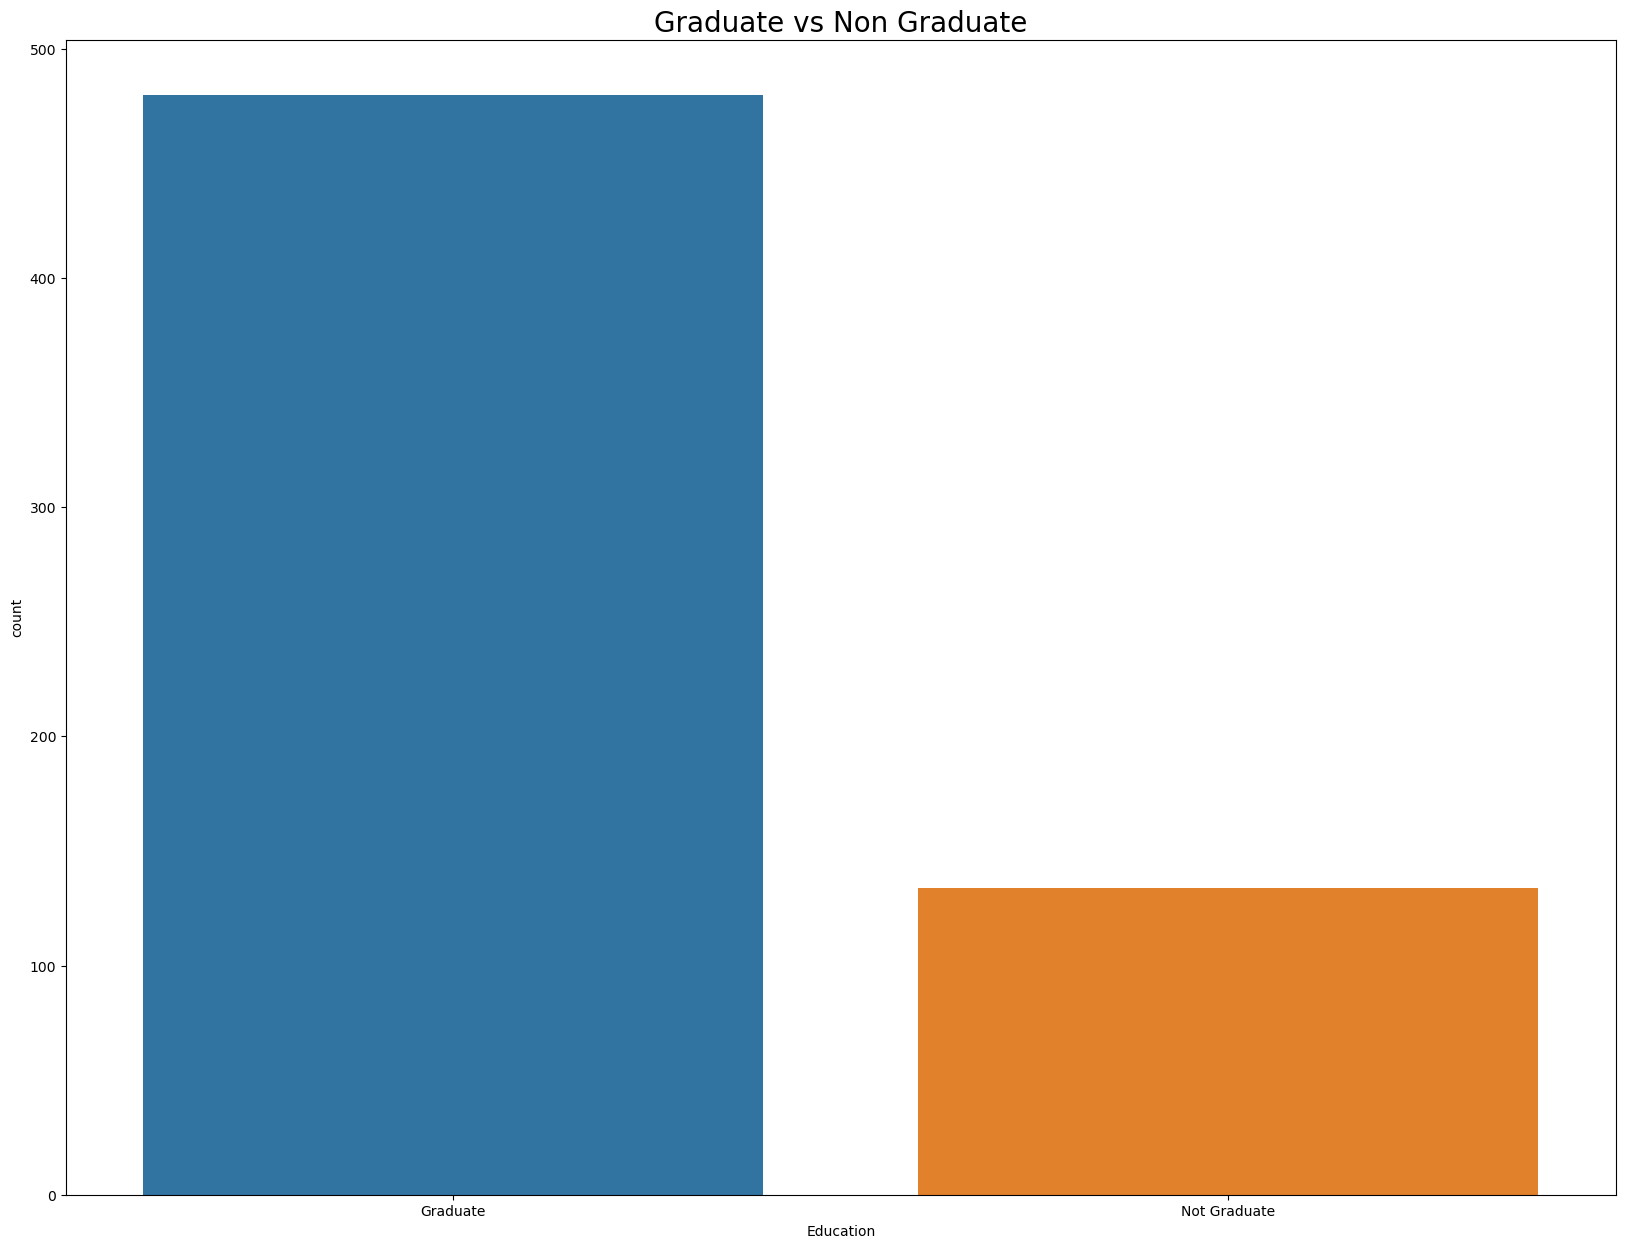

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.countplot(x="Education", data=df)
plt.title("Graduate vs Non Graduate", fontsize = 20)
plt.show()

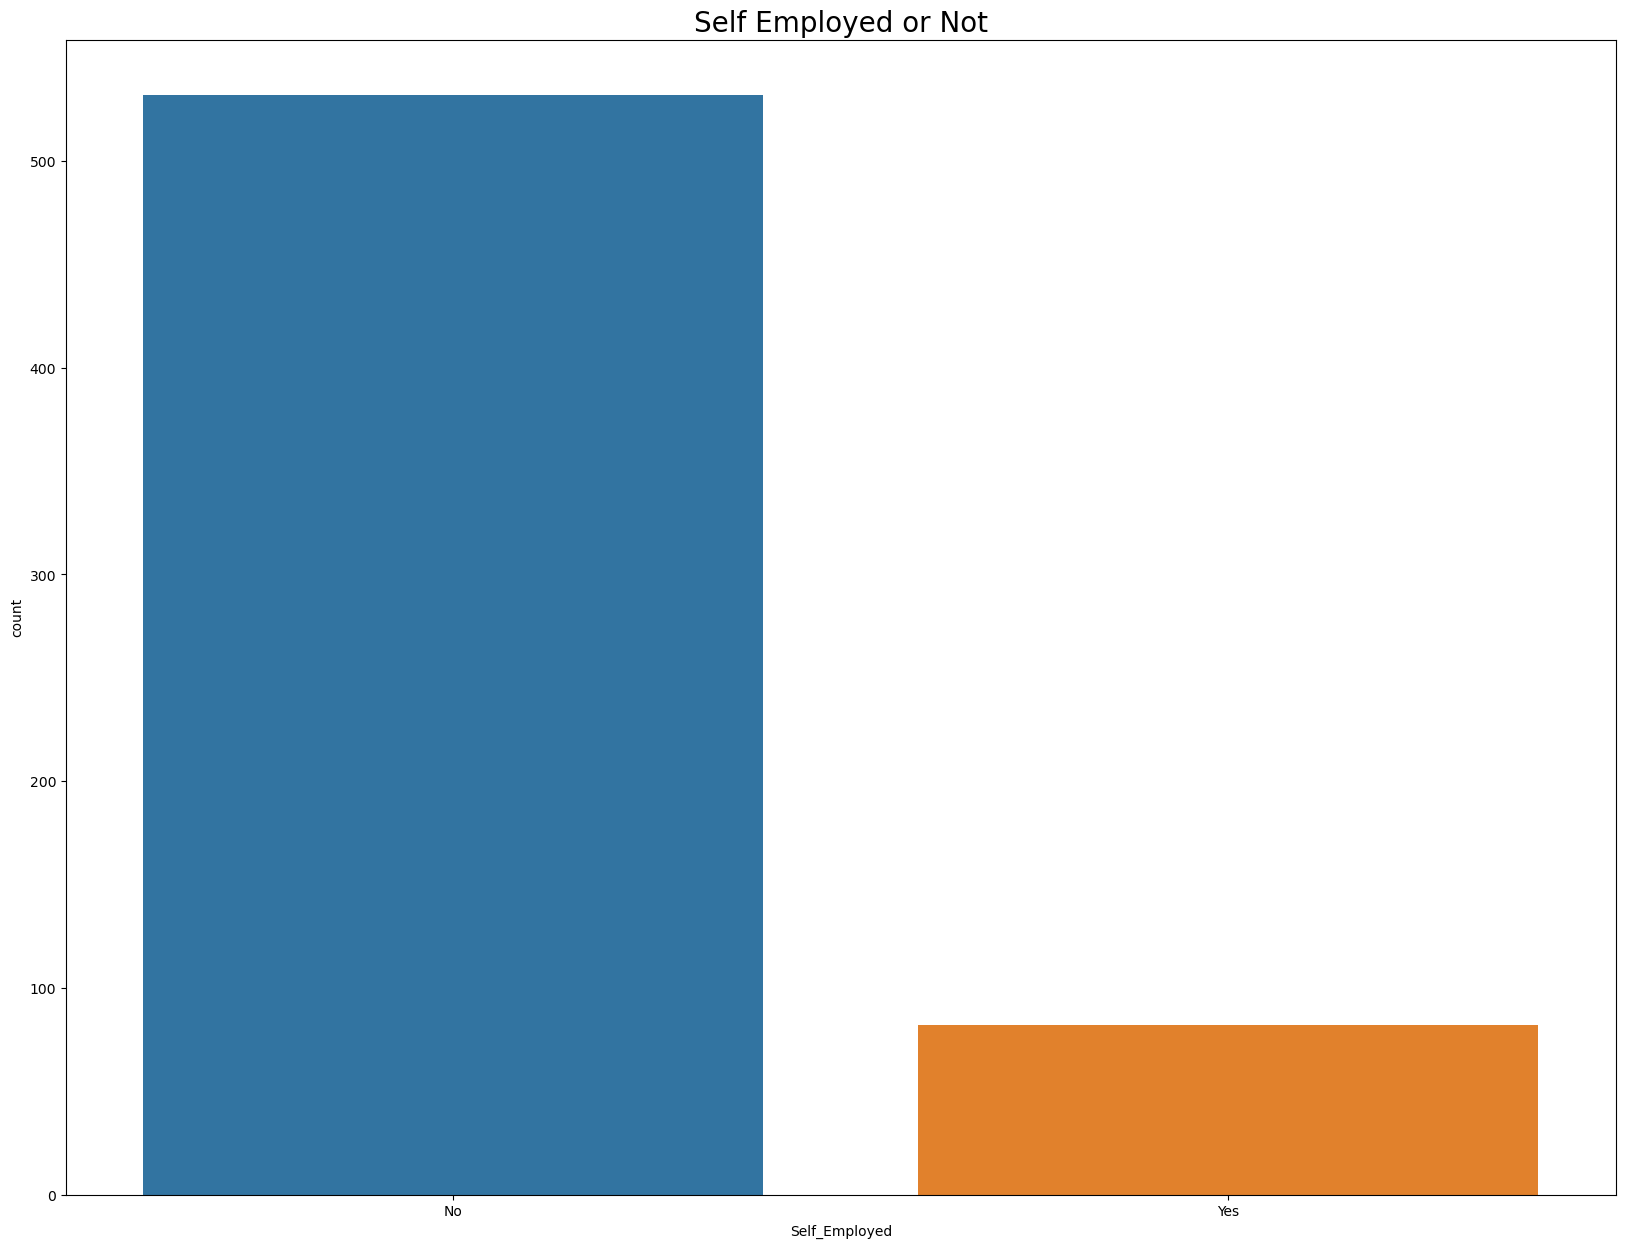

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.countplot(x="Self_Employed", data=df)
plt.title("Self Employed or Not", fontsize = 20)
plt.show()

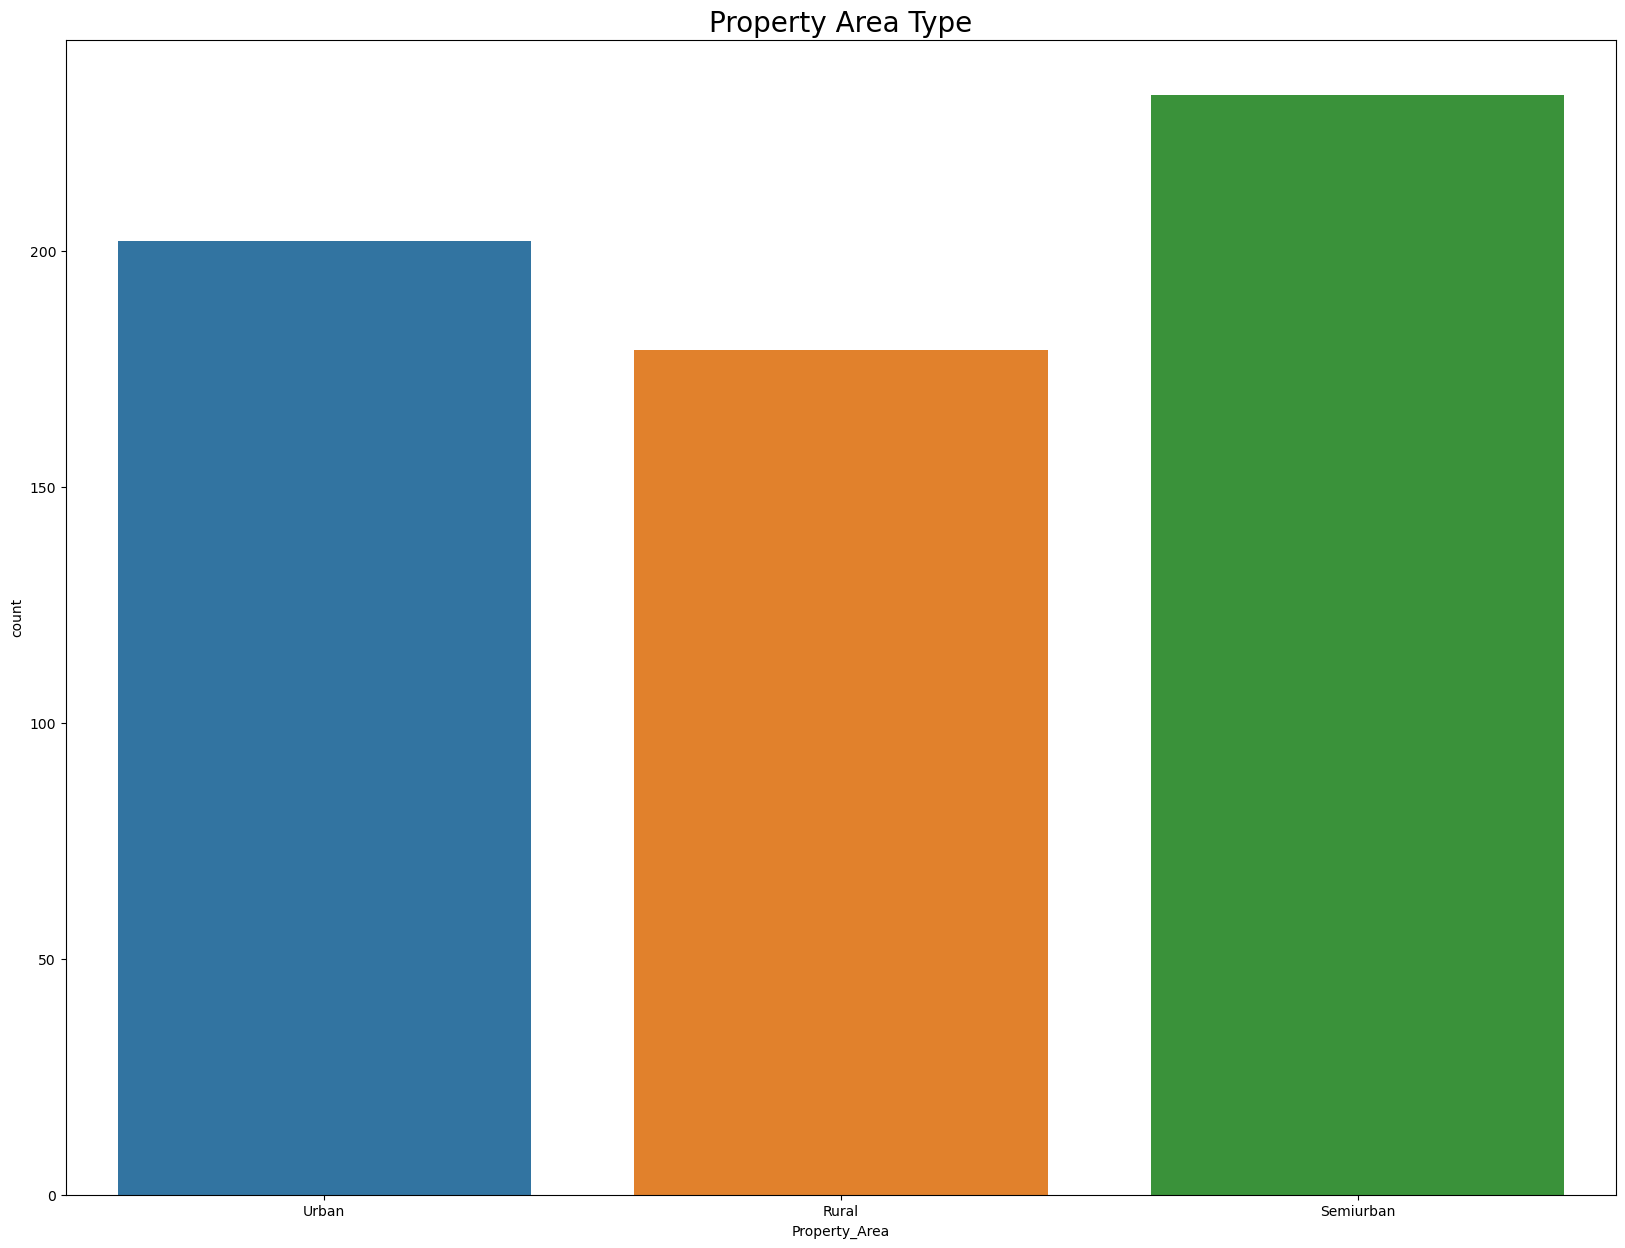

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.countplot(x="Property_Area", data=df)
plt.title("Property Area Type", fontsize = 20)
plt.show()

# Bi-variate Analysis

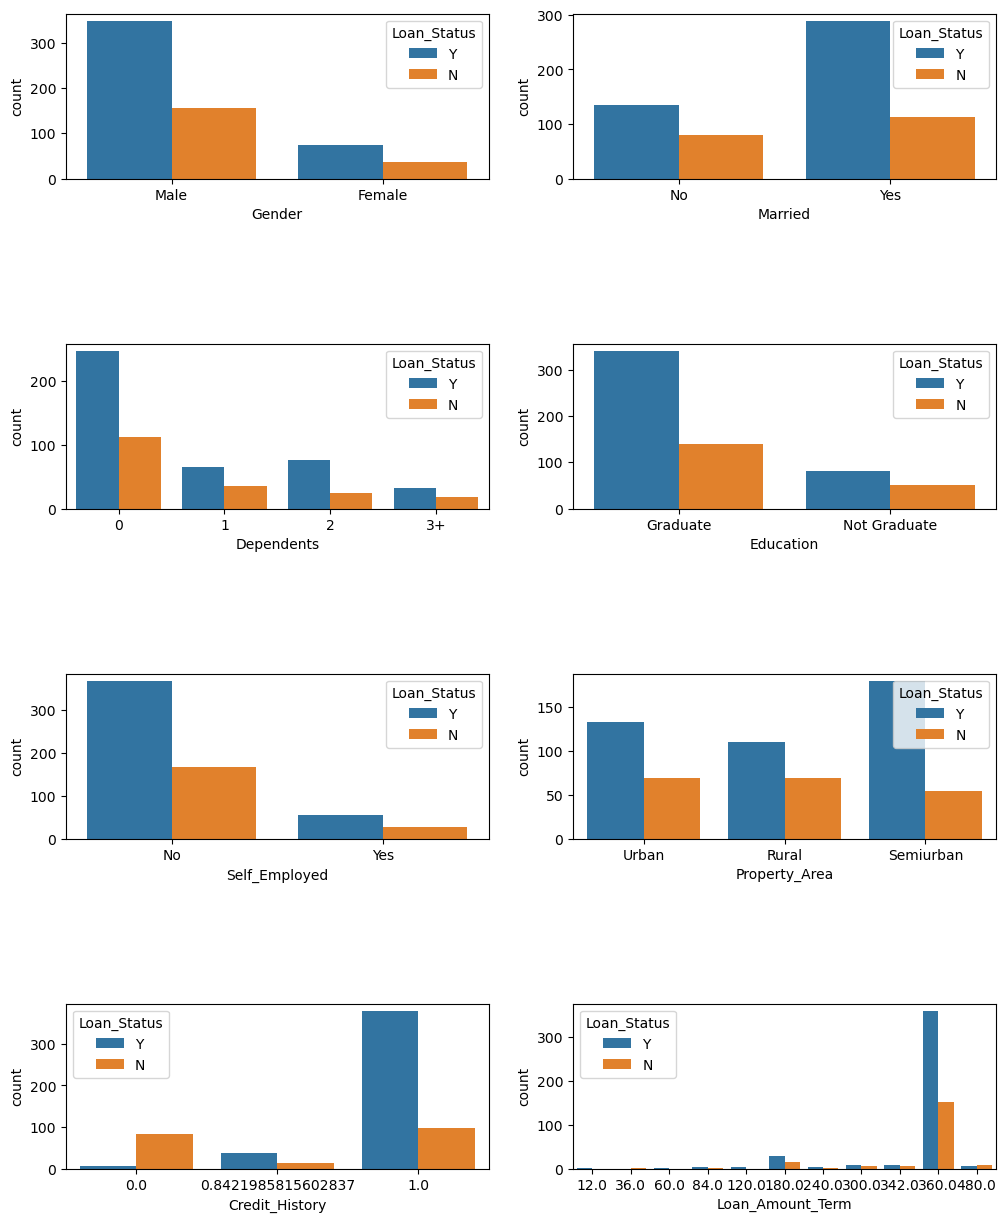

In [25]:
label_list=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2 #getting size of plots in row and cols 
    sns.countplot(x=cat,data=df,hue='Loan_Status',ax=axes[row,col]) #Plotting count plot with hue Loan Status
plt.subplots_adjust(hspace=1) 

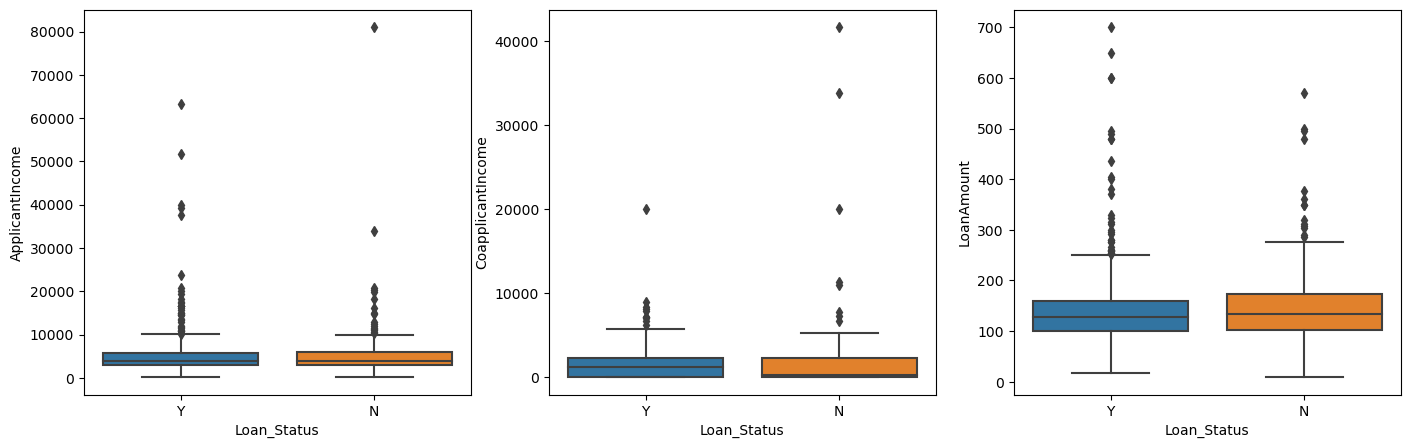

In [26]:
label_list = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(17,5)) #size of plot
for i,cat_col in enumerate(label_list):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[i])
plt.subplots_adjust(hspace=1) #plotting the graph

# Multi-Variate Analysis

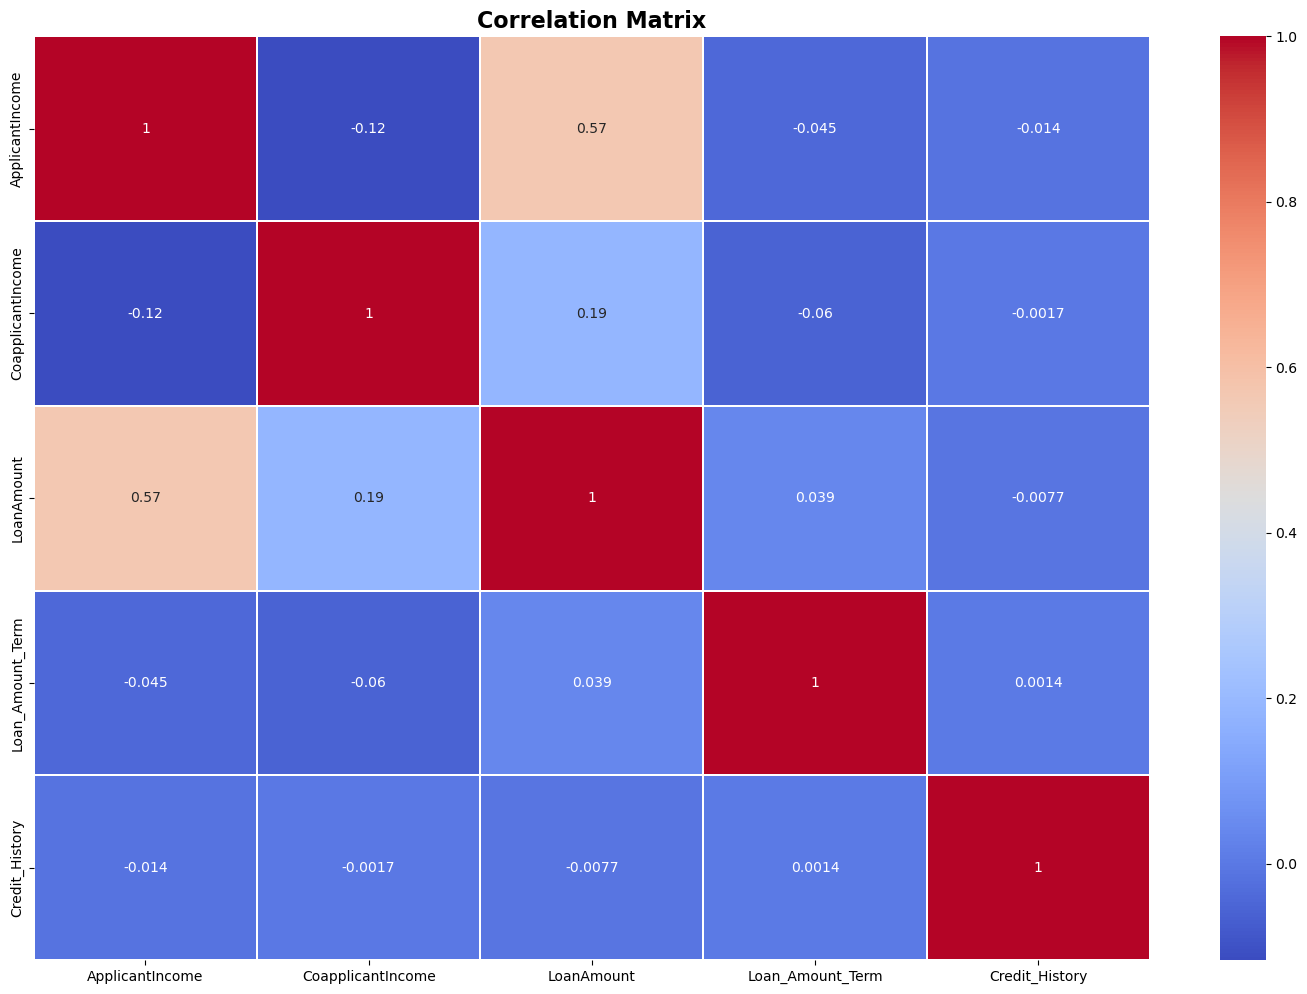

In [30]:
numeric_columns = df.select_dtypes(include=['number']).columns
hc = df[numeric_columns].corr(method='pearson')

fig = plt.figure(figsize=(18, 12))

sns.heatmap(hc, annot=True, cmap="coolwarm", linewidths=.1, annot_kws={"size": 10})

plt.title("Correlation Matrix", fontsize=16, fontweight='bold')
plt.show()

# Data Cleaning

In [31]:
df.drop('Loan_ID',axis=1,inplace=True)

# Removing Skewness

In [33]:
numeric_columns = df.select_dtypes(include=['number']).columns
skewness = df[numeric_columns].skew()

print(skewness)

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64


In [35]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if df[i].dtype != "object":
        if ((len(pd.unique(df[i]))) > 3):
            if abs(df.loc[:,i].skew())>0.55:
                df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

# Label Encoding

In [36]:
label_list=list(df.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_list:
    df[i] = le.fit_transform(df[i])

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.544331,-1.102837,0.235387,0.185905,1.0,2,1
1,1,1,1,0,0,0.170974,0.750578,-0.037659,0.185905,1.0,0,0
2,1,1,0,0,1,-0.499955,-1.102837,-1.346305,0.185905,1.0,2,1
3,1,1,0,1,0,-0.743873,0.891686,-0.167886,0.185905,1.0,2,1
4,1,0,0,0,0,0.582817,-1.102837,0.158610,0.185905,1.0,2,1


# Removing Outliers

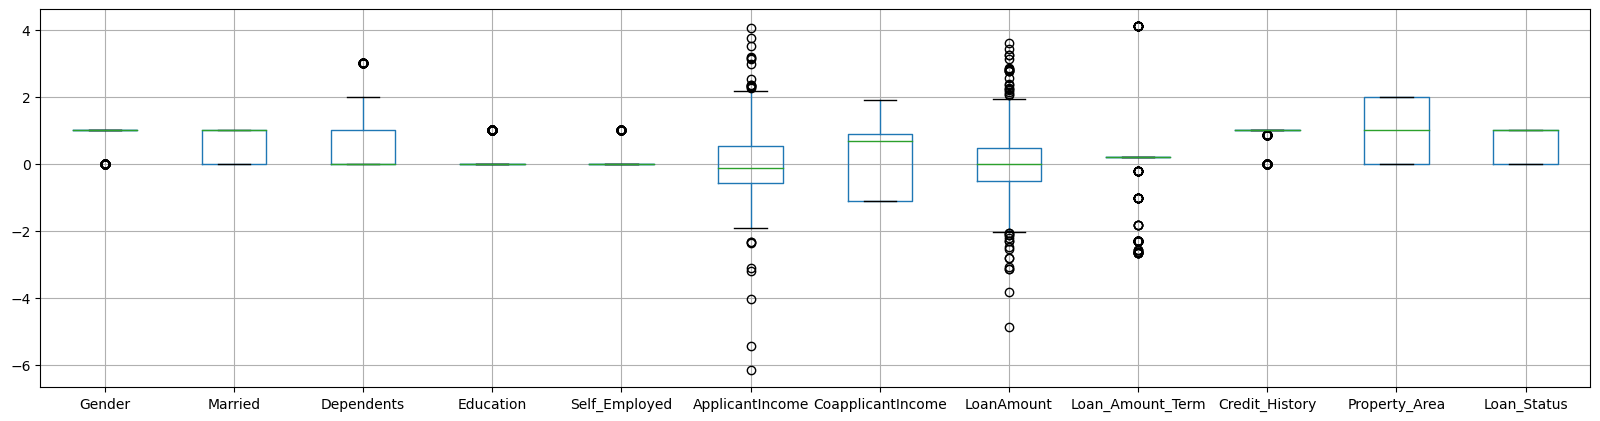

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(figsize=[20,6])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [41]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 14,  75,  94, 109, 130, 130, 133, 155, 155, 168, 171, 171, 179,
       185, 188, 216, 228, 248, 293, 298, 333, 358, 366, 369, 378, 409,
       443, 468, 500, 500, 516, 555, 561, 568, 573, 600], dtype=int64), array([7, 8, 7, 8, 7, 8, 7, 5, 7, 8, 5, 7, 8, 5, 5, 5, 8, 8, 8, 8, 5, 8,
       8, 7, 8, 5, 5, 5, 5, 8, 8, 7, 7, 7, 8, 5], dtype=int64))


In [42]:
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
print(df.shape)
print(new_df.shape)

(614, 12)
(582, 12)


In [43]:
df_percent=(614-582)/614*100
print(df_percent)

5.211726384364821


Seperating Input and Output Variables

In [44]:
x = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# Scaling

In [45]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler() #Initializting MinMaxScaler
scale_x=scaler.fit_transform(x) #fitting our data into MinMaxScaller
scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.000000,0.0,0.0,0.657450,0.000000,0.602410,0.421646,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.620785,0.618705,0.570129,0.421646,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.554899,0.000000,0.415415,0.421646,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.530946,0.665810,0.554733,0.421646,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.661229,0.000000,0.593333,0.421646,1.0,1.0


# Finding Best Random State

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
import warnings
warnings.filterwarnings('ignore')
maxAccu=0
maxRS=0
for i in range(1400,1450):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8810810810810811  on Random_state  1424


Train Test Split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Finding Best Algorithm

In [48]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [49]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("=======================================================================================")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validatio score is - ",accuracy_score(y_test,pred)-score.mean())
    print("=======================================================================================")

accuracy score of -> LogisticRegression()
0.8810810810810811
[[ 28  22]
 [  0 135]]
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        50
           1       0.86      1.00      0.92       135

    accuracy                           0.88       185
   macro avg       0.93      0.78      0.82       185
weighted avg       0.90      0.88      0.87       185

[0.81300813 0.77235772 0.7804878  0.85365854 0.81967213]
0.8078368652538984
Difference between Accuracy score and cross validatio score is -  0.07324421582718266
accuracy score of -> KNeighborsClassifier()
0.8486486486486486
[[ 29  21]
 [  7 128]]
              precision    recall  f1-score   support

           0       0.81      0.58      0.67        50
           1       0.86      0.95      0.90       135

    accuracy                           0.85       185
   macro avg       0.83      0.76      0.79       185
weighted avg       0.84      0.85      0.84       185

[0.80487805 0.

# Hyper Parameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_

{'min_samples_leaf': 5, 'max_features': 3, 'max_depth': 7}

In [51]:
clf_pred=clf.best_estimator_.predict(x_test) 

In [53]:
accuracy = accuracy_score(y_test, clf_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, clf_pred))
print("Classification Report:\n", classification_report(y_test, clf_pred))


Accuracy: 0.8648648648648649
Confusion Matrix:
 [[ 28  22]
 [  3 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.56      0.69        50
           1       0.86      0.98      0.91       135

    accuracy                           0.86       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.87      0.86      0.85       185



# AUC ROC curve

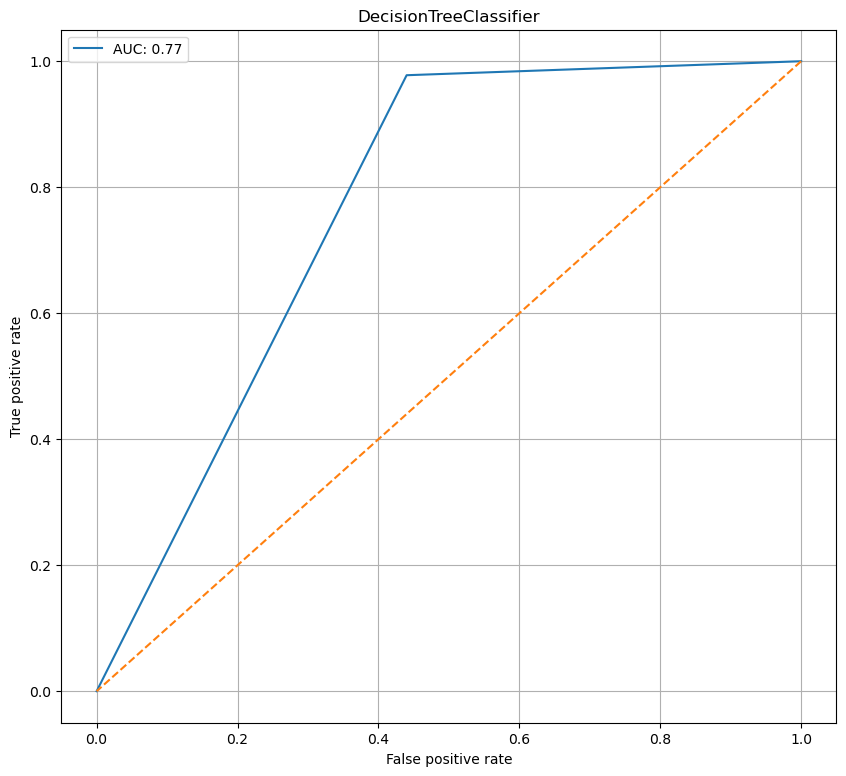

In [54]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid()

# Saving the model

In [55]:
import joblib
joblib.dump(clf.best_estimator_,"PJ7_Loan.obj")
SVR_from_joblib=joblib.load("PJ7_Loan.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184
Predicted,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
Original,1,0,0,0,1,1,1,0,1,0,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1
